<a href="https://colab.research.google.com/github/dauparas/proteins/blob/master/blosum62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use BLOSUM62 matrix to define a soft label loss.

https://en.wikipedia.org/wiki/BLOSUM

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
alphabet = 'ARNDCQEGHILKMFPSTWYV'

In [0]:
blosum62 = np.array([
[ 4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0, -3, -2,  0],
[-1,  5,  0, -2, -3,  1,  0, -2,  0, -3, -2,  2, -1, -3, -2, -1, -1, -3, -2, -3],
[-2,  0,  6,  1, -3,  0,  0,  0,  1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3],
[-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
[ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
[-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
[-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2],
[ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
[-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
[-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
[-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
[-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2],
[-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
[-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
[-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
[ 1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
[ 0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  1,  5, -2, -2,  0],
[-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
[-2, -2, -2, -3, -2, -1, -2, -3,  2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
[ 0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4]])

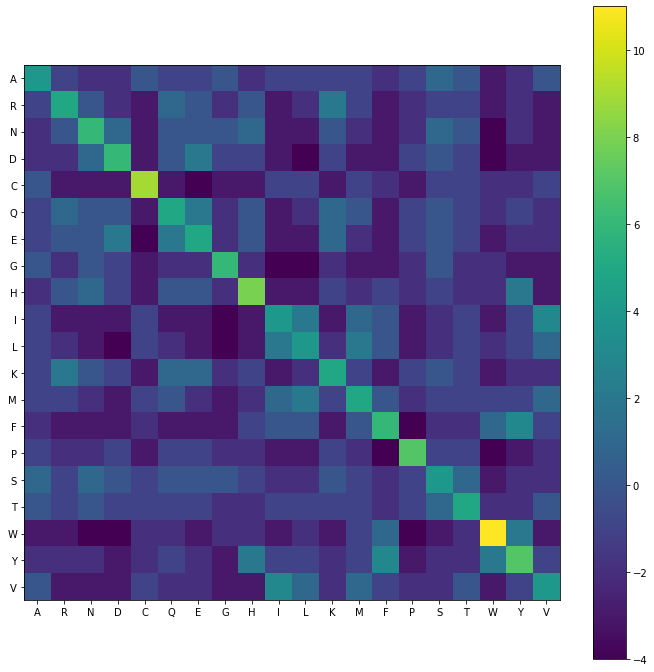

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(blosum62)
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.colorbar()

In [51]:
temperature = 2.0
similarity_matrix = np.exp(blosum62/temperature)/np.sum(np.exp(blosum62/temperature), axis=-1)[:,None]
np.sum(similarity_matrix[0,:])

0.9999999999999999

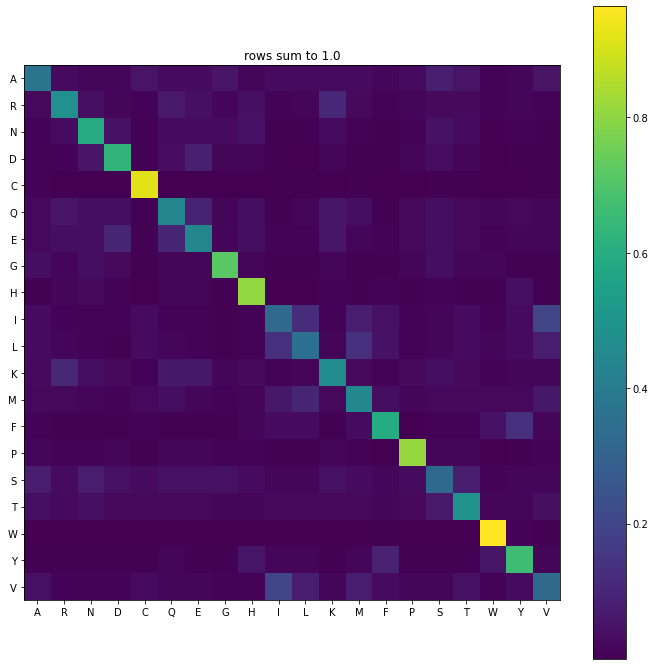

In [53]:
plt.figure(figsize=(12,12))
plt.imshow(similarity_matrix)
plt.xticks(np.arange(20), alphabet)
plt.yticks(np.arange(20), alphabet)
plt.title('rows sum to 1.0')
plt.colorbar()

In [54]:
np.diag(similarity_matrix)

array([0.37033142, 0.48865494, 0.59505289, 0.63101735, 0.92154819,
       0.43876768, 0.4416068 , 0.71679214, 0.80896847, 0.33321174,
       0.35349173, 0.46495512, 0.45173483, 0.59782346, 0.81301554,
       0.3294215 , 0.49250218, 0.96395878, 0.66659144, 0.33335154])

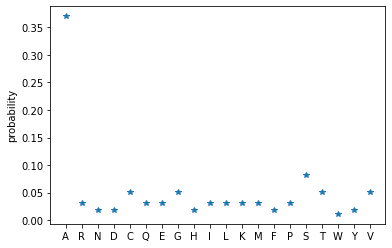

In [65]:
plt.plot(similarity_matrix[0,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');

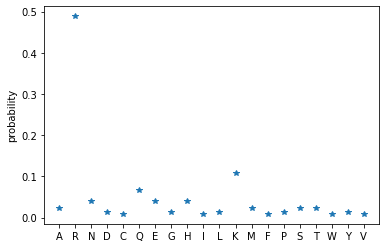

In [64]:
plt.plot(similarity_matrix[1,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');

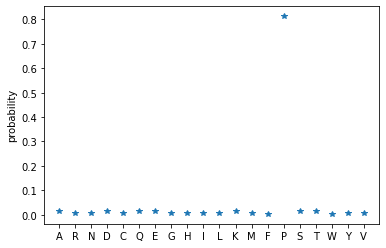

In [66]:
plt.plot(similarity_matrix[14,:],'*');
plt.xticks(np.arange(20), alphabet);
plt.ylabel('probability');